# <center>Assignment 3</center>
# <center>Pranav K Nayak - ES20BTECH11035</center>

References: 
1. [Explainable AI: How to Implement Saliency Maps](https://www.coderskitchen.com/explainable-ai-how-to-implement-saliency-maps/)
2. [Guided Backpropagation With PyTorch and TensorFlow](https://www.coderskitchen.com/guided-backpropagation-with-pytorch-and-tensorflow/)
3. [Dr. Konda Reddy's Slides](https://krmopuri.github.io/dl/lectures/)
4. [The PyTorch Tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
5. [Aditya Rastogi's Medium Article](https://medium.datadriveninvestor.com/visualizing-neural-networks-using-saliency-maps-in-pytorch-289d8e244ab4)

# Problem 1

In [86]:
import torch
import torchvision
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

### 1A

In [87]:
def backprop(path):
  def prepare_input(path):
    image = Image.open(path)
    preprocess = torchvision.transforms.Compose([
      torchvision.transforms.Resize(256),
      torchvision.transforms.CenterCrop(224),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = preprocess(image)
    image.unsqueeze_(0)

    return image
  def prepare_input(path):  # function for preparing input image to be passed into model
    image = Image.open(path)
    preprocess = torchvision.transforms.Compose([
      torchvision.transforms.Resize(256),
      torchvision.transforms.CenterCrop(224),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = preprocess(image)
    image.unsqueeze_(0)

    return image
  
  def deprocess(output): # standard code for extracting label:int from imagenet_classes.txt
    import urllib.request
    url = 'https://github.com/pytorch/hub/blob/master/imagenet_classes.txt'
    urllib.request.urlretrieve(url, 'imagenet_classes.txt')

    probabilites = torch.nn.functional.softmax(output[0], dim=0)

    with open('imagenet_classes.txt') as f:
      labels = [line.strip() for line in f.readlines()]

    top5_prob, top5_catid = torch.topk(probabilites, 5)
    for i in range(top5_prob.size(0)):
      print(labels[top5_catid[i]], top5_prob[i].item())
    return top5_catid[0]
  
  def prep_output(img_tensor):
    invTrans = torchvision.transforms.Compose([ torchvision.transforms.Normalize(mean = [ 0., 0., 0. ],
                                                    std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                            torchvision.transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                    std = [ 1., 1., 1. ]),
                            ])
    out = invTrans(img_tensor)[0]
    out = out.detach().numpy().transpose(1, 2, 0)

    return out
  
  def plot_imgs(img1, img2, vmin=0.3, vmax=0.7, mix_val=2): # plots three images side by side with 3rd being a mix of 1st and 2nd
    f = plt.figure(figsize=(15, 45))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, vmin=vmin, vmax=vmax ,cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img2, vmin=vmin, vmax=vmax ,cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img1 * mix_val + img2/mix_val ,cmap='gray')
    plt.axis('off')
  

  def norm_flat_image(img):   # converts 3 channel image to grayscale
    grads_norm = prep_output(img)
    grads_norm = grads_norm[:,:,0]+ grads_norm[:,:,1]+ grads_norm[:,:,2]
    grads_norm = (grads_norm - np.min(grads_norm))/ (np.max(grads_norm)- np.min(grads_norm))
    return grads_norm

  test_model = torchvision.models.resnet50(weights='IMAGENET1K_V2')
  test_model.eval()
  input_img = prepare_input(path)
  
  input_img.requires_grad = True
  output = test_model(input_img)
  best_id = deprocess(output)

  output[0, best_id].backward()
  grads = input_img.grad
  # print(f"best_id: {best_id}")
  plot_imgs(norm_flat_image(grads), norm_flat_image(input_img))

In [88]:
backprop('img/i1.jpg')

<ul class="list-style-none f5 px-lg-4 border-lg-right mb-4 mb-lg-0 pr-lg-7"> 0.33013343811035156
<nav class="mt-0 px-3 px-lg-0 mb-3 mb-lg-0" aria-label="Global"> 0.10297703742980957
<div data-turbo-body class="logged-out env-production page-responsive page-blob" style="word-wrap: break-word;"> 0.01068081147968769
<div> 0.0070418622344732285
<li class="HeaderMenu-item position-relative flex-wrap flex-justify-between flex-items-center d-block d-lg-flex flex-lg-nowrap flex-lg-items-center js-details-container js-header-menu-item"> 0.006998952943831682


In [89]:
backprop('img/i2.jpg')


<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_mini-throt-a33094-b03defd3289b.js"></script> 0.22726687788963318
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/repositories-8093725f8825.js"></script> 0.07849932461977005
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/vendors-node_modules_github_file-attachment-element_dist_index_js-node_modules_github_mini-th-85225b-a5dd5c19bf8b.js"></script> 0.054647479206323624
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/app_assets_modules_github_diffs_blob-lines_ts-app_assets_modules_github_diffs_linkable-line-n-f96c66-97aade341120.js"></script> 0.024858104065060616
<script crosso

 0.5291109681129456
</li> 0.01954157091677189
<svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-link-external HeaderMenu-external-icon color-fg-subtle"> 0.006773045752197504
data-jump-to-suggestions-path="/_graphql/GetSuggestedNavigationDestinations" 0.006074938923120499
Fund open source developers 0.0038439861964434385


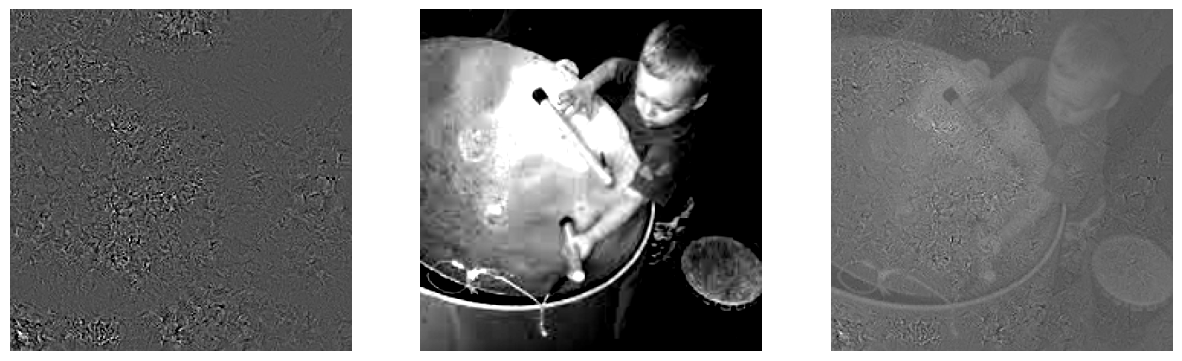

In [90]:
backprop('img/i3.jpg')


<a class="HeaderMenu-dropdown-link lh-condensed d-block no-underline position-relative py-2 Link--secondary" data-analytics-event="{&quot;category&quot;:&quot;Header dropdown (logged out), Open Source&quot;,&quot;action&quot;:&quot;click to go to Trending&quot;,&quot;label&quot;:&quot;ref_cta:Trending;&quot;}" href="/trending"> 0.14038681983947754
Trending 0.11097073554992676
</div> 0.059190794825553894
 0.03327452391386032
<span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span> 0.029975589364767075


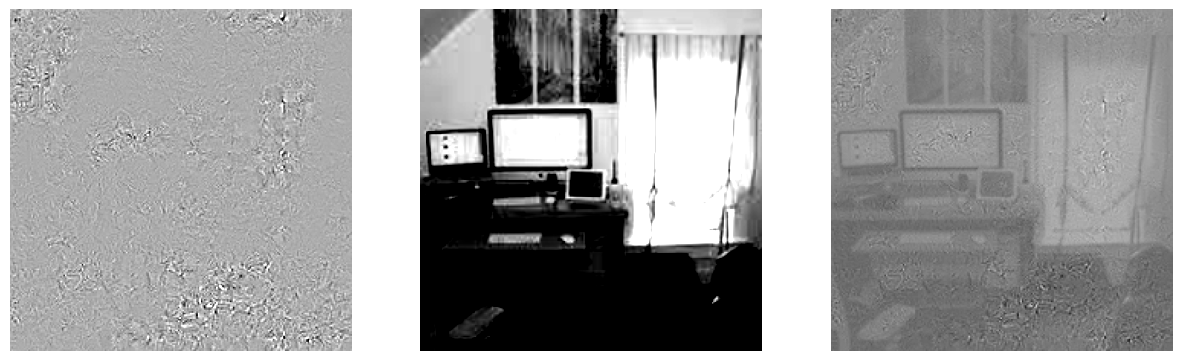

In [91]:
backprop('img/i4.jpg')


<div class="color-fg-default h4">Codespaces</div> 0.13693560659885406
<div> 0.07130373269319534
 0.01718800887465477
<li> 0.00788795668631792
</div> 0.007716058287769556


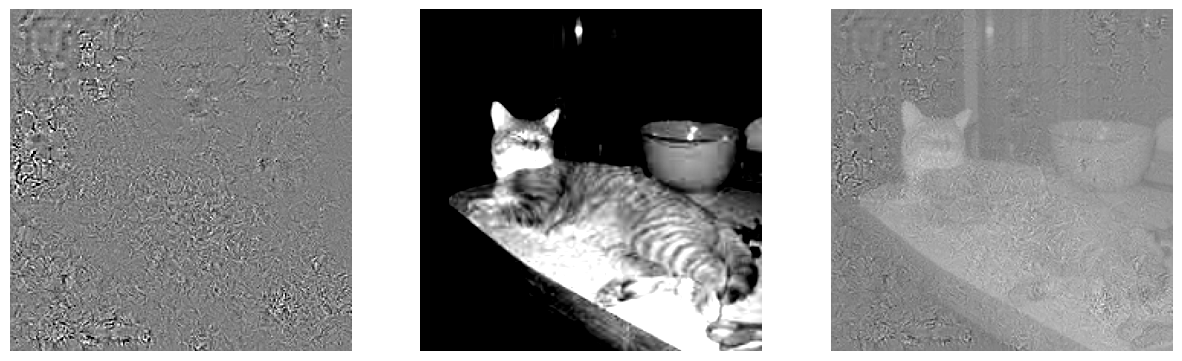

In [92]:
backprop('img/i5.jpg')


### 1B

In [93]:
def guided_backprop(path): # most code is identical to backprop function, but with a backward hook added to the model
  def prepare_input(path):
    image = Image.open(path)
    preprocess = torchvision.transforms.Compose([
      torchvision.transforms.Resize(256),
      torchvision.transforms.CenterCrop(224),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = preprocess(image)
    image.unsqueeze_(0)

    return image
  def prepare_input(path):
    image = Image.open(path)
    preprocess = torchvision.transforms.Compose([
      torchvision.transforms.Resize(256),
      torchvision.transforms.CenterCrop(224),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = preprocess(image)
    image.unsqueeze_(0)

    return image
  
  def deprocess(output):
    import urllib.request
    url = 'https://github.com/pytorch/hub/blob/master/imagenet_classes.txt'
    urllib.request.urlretrieve(url, 'imagenet_classes.txt')

    probabilites = torch.nn.functional.softmax(output[0], dim=0)

    with open('imagenet_classes.txt') as f:
      labels = [line.strip() for line in f.readlines()]

    top5_prob, top5_catid = torch.topk(probabilites, 5)
    for i in range(top5_prob.size(0)):
      print(labels[top5_catid[i]], top5_prob[i].item())
    return top5_catid[0]
  
  def prep_output(img_tensor):
    invTrans = torchvision.transforms.Compose([ torchvision.transforms.Normalize(mean = [ 0., 0., 0. ],
                                                    std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                            torchvision.transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                    std = [ 1., 1., 1. ]),
                            ])
    out = invTrans(img_tensor)[0]
    out = out.detach().numpy().transpose(1, 2, 0)

    return out
  
  def plot_imgs(img1, img2, vmin=0.3, vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15, 45))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, vmin=vmin, vmax=vmax ,cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img2, vmin=vmin, vmax=vmax ,cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img1 * mix_val + img2/mix_val ,cmap='gray')
    plt.axis('off')
  

  def norm_flat_image(img):
    grads_norm = prep_output(img)
    grads_norm = grads_norm[:,:,0]+ grads_norm[:,:,1]+ grads_norm[:,:,2]
    grads_norm = (grads_norm - np.min(grads_norm))/ (np.max(grads_norm)- np.min(grads_norm))
    return grads_norm

  test_model = torchvision.models.resnet50(weights='IMAGENET1K_V2')
  test_model.eval()
  
  def relu_hook(module, grad_in, grad_out):
    if isinstance(module, torch.nn.ReLU):
        return (torch.clamp(grad_in[0], min=0.),)
  
  for i, module in enumerate(test_model.modules()):
    if isinstance(module, torch.nn.ReLU):
      module.register_backward_hook(relu_hook)
  
  image = prepare_input(path)
  image.requires_grad = True
  out = test_model(image)
  best_id = deprocess(out)
  out[0, best_id].backward()
  
  guided_grads = image.grad
  plot_imgs(norm_flat_image(guided_grads), norm_flat_image(image))
  return norm_flat_image(guided_grads)

/home/fuji/.virtualenvs/DL/lib/python3.9/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


<ul class="list-style-none f5 px-lg-4 border-lg-right mb-4 mb-lg-0 pr-lg-7"> 0.33013343811035156
<nav class="mt-0 px-3 px-lg-0 mb-3 mb-lg-0" aria-label="Global"> 0.10297703742980957
<div data-turbo-body class="logged-out env-production page-responsive page-blob" style="word-wrap: break-word;"> 0.01068081147968769
<div> 0.0070418622344732285
<li class="HeaderMenu-item position-relative flex-wrap flex-justify-between flex-items-center d-block d-lg-flex flex-lg-nowrap flex-lg-items-center js-details-container js-header-menu-item"> 0.006998952943831682


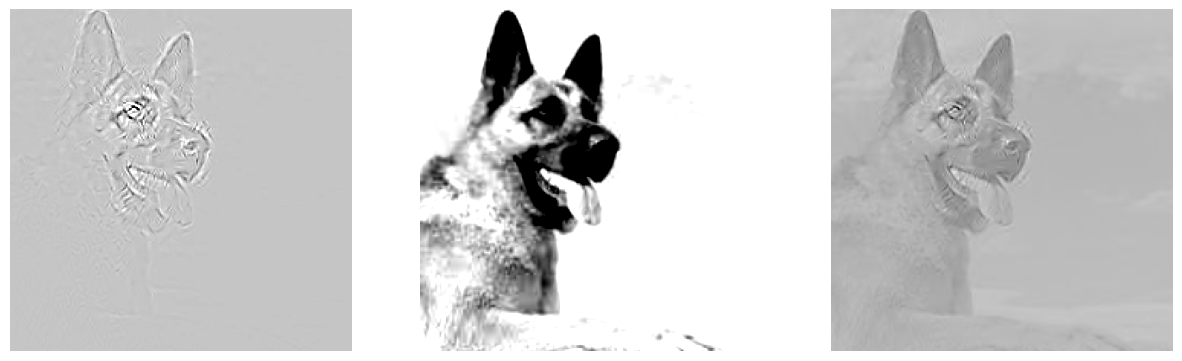

In [94]:
g1 = guided_backprop('img/i1.jpg')

<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_mini-throt-a33094-b03defd3289b.js"></script> 0.22726687788963318
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/repositories-8093725f8825.js"></script> 0.07849932461977005
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/vendors-node_modules_github_file-attachment-element_dist_index_js-node_modules_github_mini-th-85225b-a5dd5c19bf8b.js"></script> 0.054647479206323624
<script crossorigin="anonymous" defer="defer" type="application/javascript" src="https://github.githubassets.com/assets/app_assets_modules_github_diffs_blob-lines_ts-app_assets_modules_github_diffs_linkable-line-n-f96c66-97aade341120.js"></script> 0.024858104065060616
<script crosso

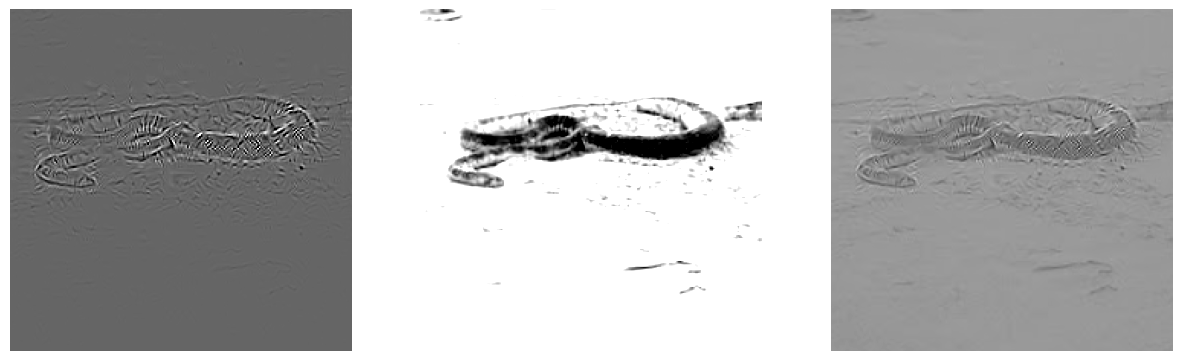

In [95]:
g2 = guided_backprop('img/i2.jpg')

In [96]:
g3 = guided_backprop('img/i3.jpg')

 0.5291109681129456
</li> 0.01954157091677189
<svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-link-external HeaderMenu-external-icon color-fg-subtle"> 0.006773045752197504
data-jump-to-suggestions-path="/_graphql/GetSuggestedNavigationDestinations" 0.006074938923120499
Fund open source developers 0.0038439861964434385


In [97]:
g4 = guided_backprop('img/i4.jpg')

<a class="HeaderMenu-dropdown-link lh-condensed d-block no-underline position-relative py-2 Link--secondary" data-analytics-event="{&quot;category&quot;:&quot;Header dropdown (logged out), Open Source&quot;,&quot;action&quot;:&quot;click to go to Trending&quot;,&quot;label&quot;:&quot;ref_cta:Trending;&quot;}" href="/trending"> 0.14038681983947754
Trending 0.11097073554992676
</div> 0.059190794825553894
 0.03327452391386032
<span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span> 0.029975589364767075


<div class="color-fg-default h4">Codespaces</div> 0.13693560659885406
<div> 0.07130373269319534
 0.01718800887465477
<li> 0.00788795668631792
</div> 0.007716058287769556


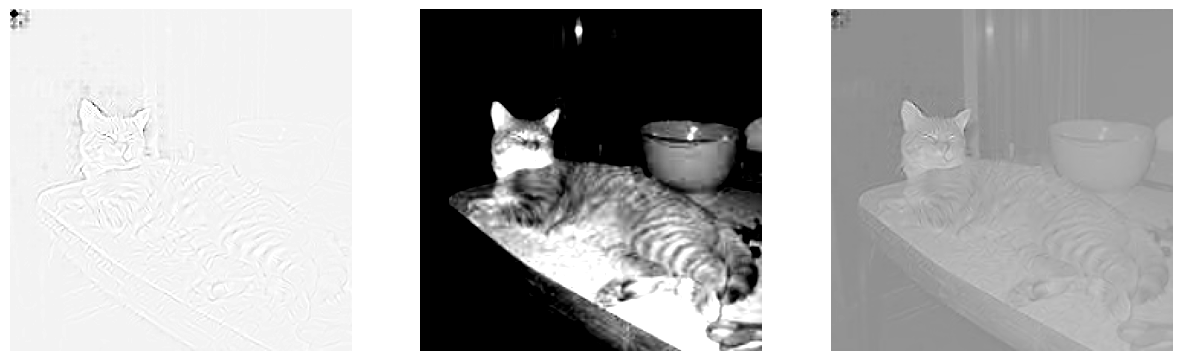

In [98]:
g5 = guided_backprop('img/i5.jpg')

### 1C

In [99]:
import torch
import torchvision.models as models
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [100]:
def cmap_generation(path):
  img = Image.open(path)
  model = models.resnet50(weights="IMAGENET1K_V2")
  model.eval()
  
  transform  = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  
  img_tensor = transform(img)
  img_tensor.unsqueeze_(0)
  
  def extract_conv(img_tensor):
    features = model.conv1(img_tensor)
    features = model.bn1(features)
    features = model.relu(features)
    features = model.maxpool(features)
    features = model.layer1(features)
    features = model.layer2(features)
    features = model.layer3(features)
    features = model.layer4(features)
    
    return features
  
  features = extract_conv(img_tensor)
  features = features.detach().cpu().numpy().squeeze()
  output = model(img_tensor)
  _, pred = torch.max(output, 1)
  
  fc_weights = model.fc.weight.detach().numpy()
  
  cam = np.zeros(features.shape[1:], dtype=np.float32)
  for i, w in enumerate(fc_weights[pred]):
    cam += w*features[i, :, :]
    
  cam = cv2.resize(cam, (224, 224))
  cam = cam - np.min(cam)
  cam = cam / np.max(cam)
  cam = np.uint8(255 * cam)
  
  heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  
  image = (img_tensor.squeeze(0).detach().cpu().numpy()).transpose(1, 2, 0)
  plt.imshow(image)
  plt.imshow(heatmap, alpha=0.6, cmap='jet')
  

In [101]:
cmap_generation('img/i1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [102]:
cmap_generation('img/i2.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [103]:
cmap_generation('img/i3.jpg')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [104]:
cmap_generation('img/i4.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [105]:
cmap_generation('img/i5.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### 1D

In [106]:
import torch
import torchvision.models as models
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [107]:
conv_grad = None
def grad_cmap(path):
  img = Image.open(path)
  model = models.resnet50(weights="IMAGENET1K_V2")
  model.eval()
  
  transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  
  img_tensor = transform(img)
  img_tensor.unsqueeze_(0)

  def conv_hook(module, grad_in, grad_out):
    global conv_grad
    conv_grad = grad_out[0].detach().numpy()
    # print("Hello")
  model.layer4.register_full_backward_hook(conv_hook)
  
  def extract_conv(img_tensor):
    features = model.conv1(img_tensor)
    features = model.bn1(features)
    features = model.relu(features)
    features = model.maxpool(features)
    features = model.layer1(features)
    features = model.layer2(features)
    features = model.layer3(features)
    features = model.layer4(features)
    
    return features
  
  features = extract_conv(img_tensor)
  features = features.detach().numpy().squeeze()
  output = model(img_tensor)
  _, pred = torch.max(output, 1)
  
  
  

  output[0, pred].backward()
  global conv_grad
  
  weights = np.mean(conv_grad, axis=(2, 3))[0]
  gradcam = np.zeros(features.shape[1:], dtype=np.float32)
  
  for i, w in enumerate(weights):
    gradcam += w * features[i, :, :]
  
  gradcam = cv2.resize(gradcam, (224, 224))
  gradcam = gradcam - np.min(gradcam)
  gradcam = gradcam / np.max(gradcam)
  gradcam = np.uint8(255 * gradcam)
  
  heatmap = cv2.applyColorMap(gradcam, cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  
  return gradcam
  
  

In [108]:
gradcam1= grad_cmap('img/i1.jpg')
gradcam2 = grad_cmap('img/i2.jpg')
gradcam3 = grad_cmap('img/i3.jpg')
gradcam4 = grad_cmap('img/i4.jpg')
gradcam5 = grad_cmap('img/i5.jpg')

In [109]:
g_gc1 = g1 * gradcam1
g_gc2 = g2 * gradcam2
g_gc3 = g3 * gradcam3
g_gc4 = g4 * gradcam4
g_gc5 = g5 * gradcam5

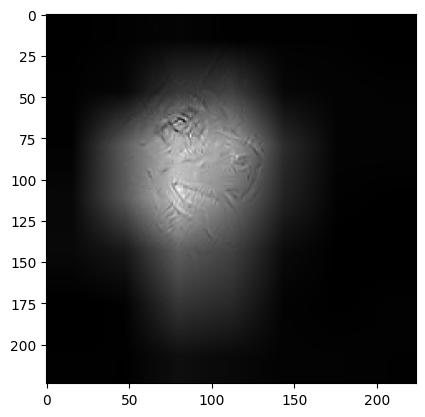

In [110]:
plt.imshow(g_gc1, cmap='gray')

In [111]:
plt.imshow(g_gc2, cmap='gray')


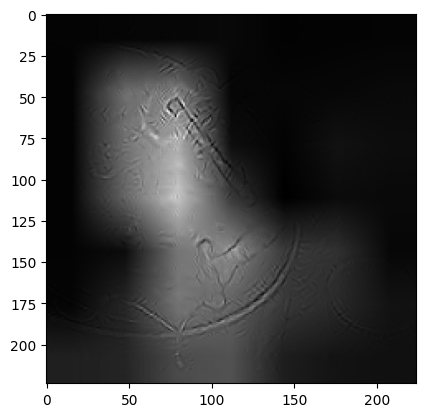

In [112]:
plt.imshow(g_gc3, cmap='gray')


In [113]:
plt.imshow(g_gc4, cmap='gray')


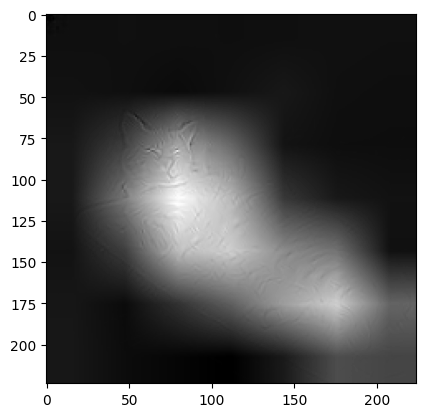

In [114]:
plt.imshow(g_gc5, cmap='gray')


***

## Problem 2

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random


In [133]:
def f(x, y):
    return 10 * x**2 + y**2

def df_dx(x, y):
    return 20 * x

def df_dy(x, y):
    return 2 * y


### 2A

In [134]:
def sgd(x_init, y_init, lr, n_epochs):
    x, y = x_init, y_init
    history = [(x, y)]
    for epoch in range(n_epochs):
        dx, dy = df_dx(x, y), df_dy(x, y)
        x -= lr * dx
        y -= lr * dy
        history.append((x, y))
    return history


In [135]:
def animate(history):
    fig, ax = plt.subplots()
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    x_range = np.linspace(-10, 10, 100)
    y_range = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='hot')
    line, = ax.plot([], [], 'r', lw=2)

    x_data, y_data = [], []
    
    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x, y = history[frame]
        x_data.append(x)
        y_data.append(y)
        line.set_data(x_data, y_data)
        return line,

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True)
    return ani


In [136]:
history = sgd(x_init=2, y_init=2, lr=0.01, n_epochs=50)
ani = animate(history)
print(len(history))

ani.save('SGD.gif', writer='ffmpeg', fps=30)

51


### 2B

In [137]:
def sgd_momentum(x_init, y_init, v0, rho,  lr, n_epochs):
  x, y, v_x, v_y = x_init, y_init, v0, v0
  history = [(x, y)]
  for epoch in range(n_epochs):
    
    v_x = rho * v_x + df_dx(x, y)
    v_y = rho * v_y + df_dy(x, y)
    
    x -= lr*v_x
    y -= lr*v_y
    
    history.append((x, y))
  return history

In [138]:
history = sgd_momentum(x_init=2, y_init=2, v0=0, rho=0.9, lr=0.01, n_epochs=100)

In [139]:
ani = animate(history)
ani.save('SGD_momentum.gif', writer='ffmpeg', fps=30)

### 2C

In [140]:
def sgd_nesterov(x_init, y_init, v0=0, rho=0.09, lr=0.01, n_epochs=100):
  x, y, v_x, v_y = x_init, y_init, v0, v0
  history = [(x, y)]
  for epoch in range(n_epochs):
    # v_x = rho * v_x + df_dx(x + rho * v_x, y + rho * v_y)/2 # to ensure that x's updates do not grow exponentially
    # v_y = rho * v_y + df_dy(x + rho * v_x, y + rho * v_y)
    # x -= lr * v_x
    # y -= lr * v_y
    
    v_x = rho * v_x - lr * df_dx(x + rho * v_x, y + rho * v_y)
    v_y = rho * v_y - lr * df_dy(x + rho * v_x, y + rho * v_y)
    
    x += v_x
    y += v_y
    
    history.append((x, y))
  
  return history
    
    

In [141]:
history = sgd_nesterov(x_init=2, y_init=2, v0=0, rho=0.9, lr=0.01, n_epochs=500)

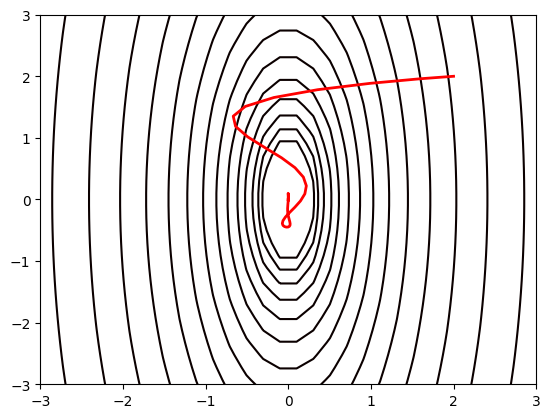

In [142]:
ani = animate(history)
ani.save('nesterov_momentum.gif', writer='ffmpeg', fps=30)

### 2D

In [143]:
def adagrad(x_init, y_init, lr, n_epochs, epsilon = 0.01):
  x, y = x_init, y_init
  history = [(x, y)]
  dx_sqr = 0
  dy_sqr = 0
  for epoch in range(n_epochs):
    dx = df_dx(x, y)
    dx_sqr += dx ** 2
    x -= lr * dx / (np.sqrt(dx_sqr) + epsilon)
    
    dy = df_dy(x, y)
    dy_sqr += dy ** 2
    y -= lr * dy / (np.sqrt(dy_sqr) + epsilon)
    
    history.append((x, y))
    
  return history

In [144]:
history = adagrad(x_init=2, y_init=2, lr=0.5, n_epochs=100, epsilon=0.01)

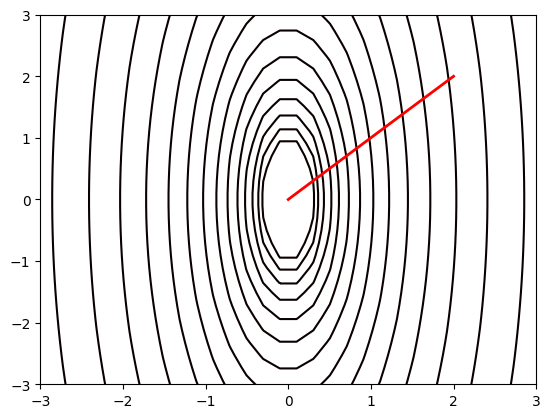

In [145]:
ani = animate(history)
ani.save('adagrad.gif', writer='ffmpeg', fps=30)

### 2D

In [146]:
def rms_prop(x_init, y_init, lr, n_epochs, rho=0.1, epsilon=0.01):
  x, y = x_init, y_init
  history = [(x, y)]
  dx_sqr = 0
  dy_sqr = 0
  for epoch in range(n_epochs):
    dx = df_dx(x, y)
    dx_sqr = rho * dx_sqr + (1-rho) * (dx ** 2)
    x -= lr * dx / (np.sqrt(dx_sqr) + epsilon)
    
    dy = df_dy(x, y)
    dy_sqr = rho * dy_sqr + (1-rho) * (dy ** 2)
    y -= lr * dy / (np.sqrt(dy_sqr) + epsilon)

    history.append((x, y))
  return history

In [147]:
history = rms_prop(x_init=2, y_init=2, lr=0.1, n_epochs=100, rho=0.1, epsilon=0.01)

In [148]:
ani = animate(history)
ani.save('rms_prop.gif', writer='ffmpeg', fps=30)